# Lista 5

## Uczenie maszynowe i sztuczna inteligencja

## Wstęp
Na tej liście przejdziemy już do wykorzystywania bardziej zaawansowanych sieci neuronowych w tym konwolucyjnych. Do konstrukcji sieci skorzystamy z Keras'a.

# Zadanie 1 (15pt)

W celu zaliczenia zadania należy uzupełnić wszystkie brakujące elementu kodu, wykonać wszystkie polecenia i wyuczyć model.



### **1. Stworzenie sieci konwolucyjnej (splotowej) i zapobieganie jej przeuczeniu z wykorzystaniem różnych metod przeciwdziałania temu zjawisku**

W pierwszym etapie przygotujmy dane do treningu - wykorzystamy zbiór Fashion MNIST.

> [Zbiór Fashion MNIST](https://keras.io/api/datasets/fashion_mnist/)

Wczytaj zbiór danych Fashion MNIST. Ze zbioru testowego wyodrębnij 50% danych - zbiór walidacyjny.

In [1]:
# wyświetlanie wszystkich wyników z komórki (nie trzeba print(...))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist

# tutaj umieść rozwiązanie
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=420
)

Dostosujmy kształt danych wejściowych.

In [3]:
# uzupełnij kod
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)

Zdefiniujmy teraz nasz model sieci konwolucyjnej.

In [4]:
import tensorflow as tf

no_of_classes = 10
(img_width, img_height, img_depth)  = (28, 28, 1)

# definicja modelu
model_simple = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, kernel_size=2, activation='relu', 
                           input_shape=(img_width, img_height, img_depth), padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),  # spłaszczenie danych do wykorzystania warstwy gęstej
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(no_of_classes, activation='softmax')
  ])

model_simple.compile(
    # wybór optymalizatora
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    # miara, którą chcemy monitorować
    metrics=['accuracy']
)

# wyświetlenie architektury
model_simple.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         40        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        2336      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 128)               2

W ostatnim etapie zdefiniujmy hiperparametry oraz rozpocznijmy uczenie modelu na danych treningowych. 

In [5]:
# wybór parametrów uczenia
batch_size = 32
epochs = 10
learning_rate = 0.01

In [7]:
# trening modelu 
history_simple = model_simple.fit(X_train, y_train,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  validation_data=(X_val, y_val))

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3156 - accuracy: 0.8846 - val_loss: 0.3608 - val_accuracy: 0.8648
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2731 - accuracy: 0.8980 - val_loss: 0.3595 - val_accuracy: 0.8736
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2453 - accuracy: 0.9089 - val_loss: 0.2950 - val_accuracy: 0.8928
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2227 - accuracy: 0.9162 - val_loss: 0.3037 - val_accuracy: 0.8936
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2028 - accuracy: 0.9238 - val_loss: 0.3005 - val_accuracy: 0.8980
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1858 - accuracy: 0.9307 - val_loss: 0.3017 - val_accuracy: 0.8976
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1712 - accuracy: 0.9361 - val_loss: 0.3061 - val_ac

Wyświetl na jednym wykresie, wykorzystując historię treningu modelu, jak
 zmieniała się dokładność dla danych treningowych i walidacyjnych. Czy 
da się zauważyć na wykresie jakąś zależność? Czy trening przebiegł w 
sposób, jaki byśmy oczekiwali?

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Accuracy')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

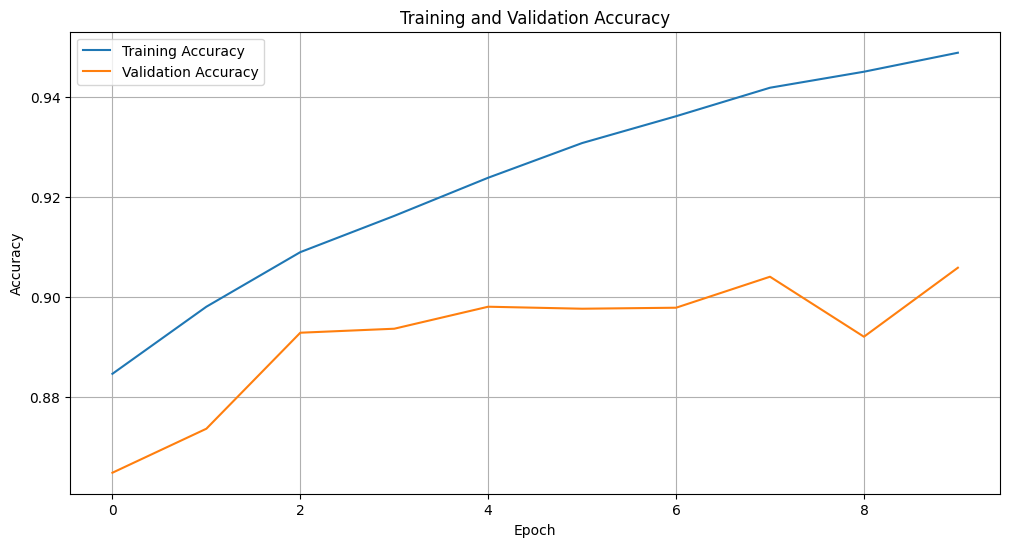

In [8]:
import matplotlib.pyplot as plt

# tutaj umieść kod
plt.figure(figsize=(12, 6))
plt.plot(history_simple.history["accuracy"], label="Training Accuracy")
plt.plot(history_simple.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

W celu poprawy wyników, które uzyskujemy oraz dodatkowo - aby zapobiegać nadmiernemu dopasowaniu do danych treningowych i uzyskiwaniu dobrej generalizacji, sprawdźmy kilka technik, które pomagają w przeciwdziałaniu przeuczeniu modelu.

Pierwszą techniką będzie **normalizacja danych**. W tym przypadku przeskalujmy dane wejściowe do zakresu od 0 do 1. 

Wykorzystując jedną z warstw przetwarzania wstępnego danych, uzupełnij 
poniższy kod tak, aby stworzyć możliwość normalizacji danych do zakresu 
0-1.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 8)         40        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        2336      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1568)             

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Accuracy')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

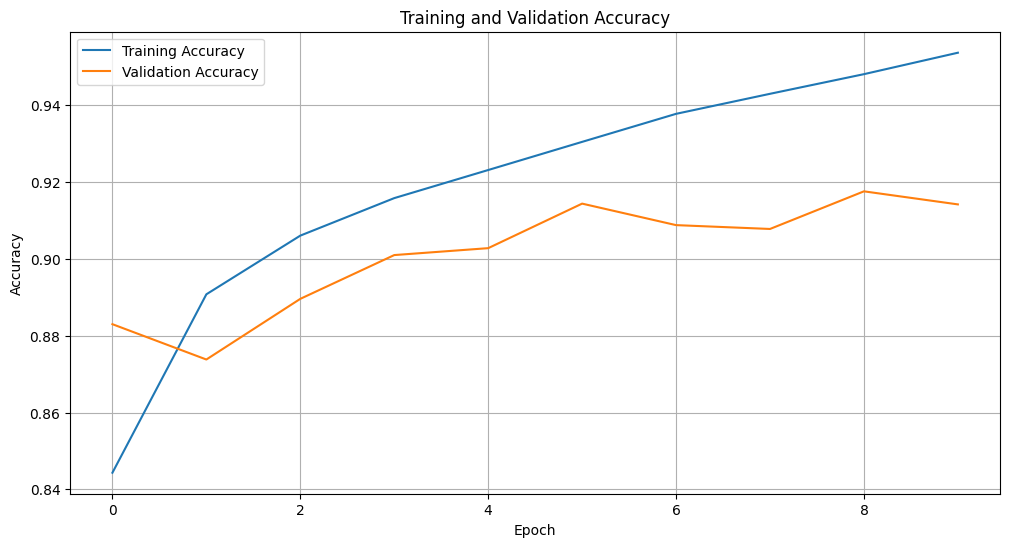

In [9]:
model_rescaling = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(
            1.0 / 255, input_shape=(img_width, img_height, img_depth)
        ),
        tf.keras.layers.Conv2D(
            8,
            kernel_size=2,
            activation="relu",
            input_shape=(img_width, img_height, img_depth),
            padding="same",
        ),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(32, kernel_size=3, activation="relu", padding="same"),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),  # spłaszczenie danych do wykorzystania warstwy gęstej
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(no_of_classes, activation="softmax"),
    ]
)

model_rescaling.compile(
    # wybór optymalizatora
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    # miara, którą chcemy monitorować
    metrics=["accuracy"],
)

# wyświetlenie architektury
model_rescaling.summary()

# trening modelu
history_simple = model_rescaling.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
)

plt.figure(figsize=(12, 6))
plt.plot(history_simple.history["accuracy"], label="Training Accuracy")
plt.plot(history_simple.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

Kolejną techniką, która wspomaga przeciwdziałanie przeuczeniu modelu, jest **augmentacja danych**.
 W szczególności powinna być stosowana, jeśli nasz zbiór danych zawiera 
mało przykładów treningowych - model nie może się uczyć uogólnień, które
 mógłby wykorzystać przy przetwarzaniu nowych danych. Stosując 
augmentację, sieć nie zobaczy tego samego obrazu dwukrotnie, jednak 
obrazy będą wyglądały wiarygodnie i będą do siebie zbliżone, więc będzie
 ona w stanie zwrócić uwagę na więcej aspektów przetwarzanych danych i tworzyć lepsze uogólnienia.

Wykorzystując dostępne warstwy przetwarzania wstępnego w pakiecie 
Keras, stwórz model sekwencyjny, zawierający minimum trzy operacje na 
obrazie (np. powiększenie, obrót itp.). Wykorzystując dowolny obraz ze 
zbioru testowego, pokaż trzykrotne wywołanie tego modelu na tym samym 
obrazie, aby zaprezentować losowość działania tych przekształceń.

<Figure size 1000x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Original')

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Augumented 1')

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Augumented 2')

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Augumented 3')

(-0.5, 27.5, 27.5, -0.5)

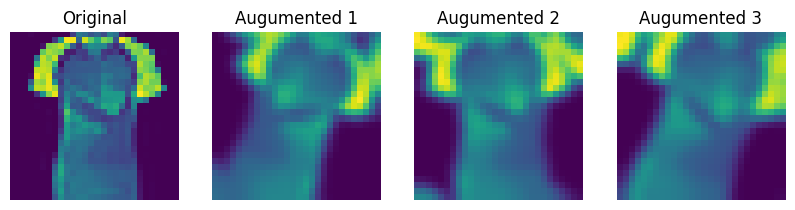

In [10]:
model_augment = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1),
    ]
)


def augument(img):
    img = tf.expand_dims(img, 0)
    img = model_augment(img)
    img = model_augment(img)
    img = model_augment(img)
    return tf.squeeze(img, axis=0)


images = [augument(X_test[0]) for _ in range(3)]

plt.figure(figsize=(10, 4))

plt.subplot(1, 4, 1)
plt.imshow(X_test[0])
plt.title("Original")
plt.axis("off")

for i in range(3):
    plt.subplot(1, 4, i + 2)
    plt.imshow(images[i].numpy())
    plt.title(f"Augumented {i+1}")
    plt.axis("off")

plt.show()

Kolejną z technik wykorzystywaną do zmniejszania ryzyka przeuczenia się sieci jest *dropout*, który polega na losowym wybieraniu zadanej liczby cech wyjściowych warstwy podczas trenowania - wartości tych warstw zastępuje się zerami.

> [Dokumentacja - warstwa dropout](https://keras.io/api/layers/regularization_layers/dropout/)


Wykorzystując stworzone we wcześniejszych krokach: normalizację, 
augmentację oraz dropout, stwórz nowy model modyfikując 
strukturę modelu *model_simple*.
 Przed pierwszą warstwą splotową dodaj normalizację, a następnie 
augmentację danych. Po każdej z warstw maxpooling dodaj dropout z 
prawdopodobieństwem 0.2. Wytrenuj model na danych treningowych i 
monitoruj jakie parametry uzyskiwane są dla danych walidacyjnych. 
Wyświetl także wykres zmiany miary dokładności w trakcie kolejnych epok 
uczenia dla danych walidacyjnych i treningowych. Czy zastosowanie tych technik przyniosło korzyść?

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 28, 28, 1)         0         
                                                                 
 random_rotation_1 (RandomRo  (None, 28, 28, 1)        0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 28, 28, 1)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 8)         40        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                  

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Accuracy')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

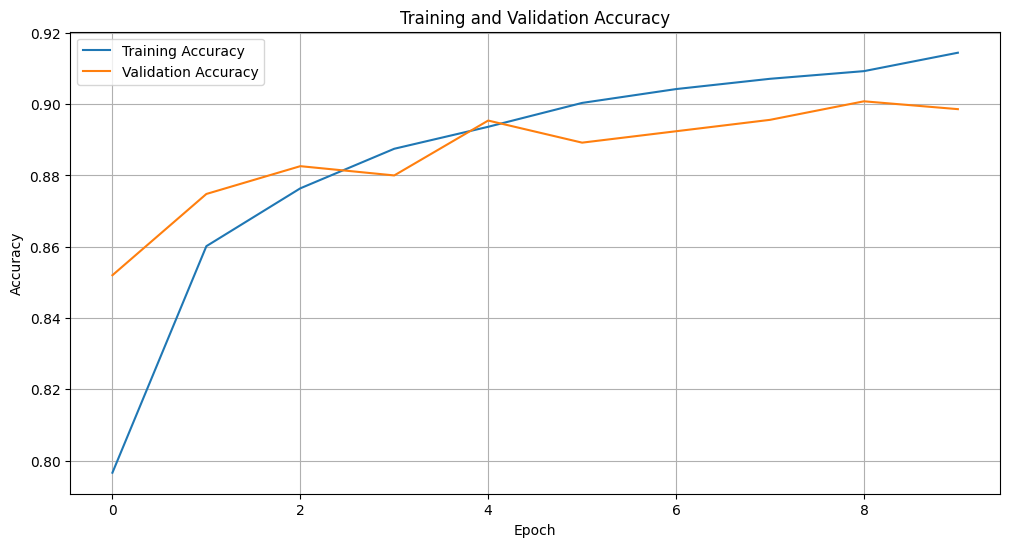

In [11]:
model_modified = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(
            1.0 / 255, input_shape=(img_width, img_height, img_depth)
        ),
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.01),
        tf.keras.layers.RandomZoom(0.1),
        tf.keras.layers.Conv2D(
            8,
            kernel_size=2,
            activation="relu",
            input_shape=(img_width, img_height, img_depth),
            padding="same",
        ),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(32, kernel_size=3, activation="relu", padding="same"),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),  # spłaszczenie danych do wykorzystania warstwy gęstej
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(no_of_classes, activation="softmax"),
    ]
)

model_modified.compile(
    # wybór optymalizatora
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    # miara, którą chcemy monitorować
    metrics=["accuracy"],
)

# wyświetlenie architektury
model_modified.summary()

# trening modelu
history_simple = model_modified.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
)

plt.figure(figsize=(12, 6))
plt.plot(history_simple.history["accuracy"], label="Training Accuracy")
plt.plot(history_simple.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

Podobnie jak na poprzedniej liście (w pyTorch) wykorzystaj **wczesne zatrzymywanie** (ang. *earlystopping*). Proces uczenia zostanie przerwany w momencie, kiedy poprawianie się monitorowanej metryki przez określoną liczbę epok się nie zmienia. Takie podejście pozwala na brak konieczności ponownego treningu sieci ze zmniejszoną liczbą epok, kiedy początkowo ustawiona liczba epok jest zbyt duża i model zaczyna się przetrenowywać. 

> [Dokumentacja - wczesne zatrzymanie](https://keras.io/api/callbacks/early_stopping/)


W połączeniu z wczesnym zatrzymywaniem treningu, stosuje się zazwyczaj wywołanie *ModelCheckpoint*, które umożliwia zapisanie stanu modelu podczas trenowania (można zapisać tylko najlepszą wersję, którą udało się uzyskać - z najlepszą wydajnością na koniec bieżącej epoki).

> [Dokumentacja - ModelCheckpoint](https://keras.io/api/callbacks/model_checkpoint/)

Przeprowadź trening prostego modelu *model_simple*,
 zwiększając liczbę epok do 30 oraz wykorzystując wcześniejsze 
zatrzymanie modelu, monitorując błąd na zbiorze walidacyjnym - jeśli nie
 zmienia się przez 4 epoki - zakończ uczenie. Dodatkowo wykorzystaj 
zapisywanie modelu - zapisując tylko najlepiej wytrenowaną wersję 
modelu, monitorując również błąd na zbiorze walidacyjnym. Ile epok 
trwało uczenie modelu?

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 random_flip_4 (RandomFlip)  (None, 28, 28, 1)         0         
                                                                 
 random_rotation_4 (RandomRo  (None, 28, 28, 1)        0         
 tation)                                                         
                                                                 
 random_zoom_4 (RandomZoom)  (None, 28, 28, 1)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 8)         40        
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 8)        0         
 g2D)                                                 

2024-05-26 17:15:01.423053: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_6/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1875/1875 [==============================] - 21s 11ms/step - loss: 0.6024 - accuracy: 0.7763 - val_loss: 0.4504 - val_accuracy: 0.8358
Epoch 2/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4278 - accuracy: 0.8425 - val_loss: 0.3615 - val_accuracy: 0.8700
Epoch 3/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3824 - accuracy: 0.8576 - val_loss: 0.3643 - val_accuracy: 0.8732
Epoch 4/30
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3515 - accuracy: 0.8712 - val_loss: 0.3431 - val_accuracy: 0.8776
Epoch 5/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3286 - accuracy: 0.8771 - val_loss: 0.3398 - val_accuracy: 0.8766
Epoch 6/30
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3124 - accuracy: 0.8846 - val_loss: 0.3201 - val_accuracy: 0.8800
Epoch 7/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3011 - accuracy: 0.8884 - val_loss: 0.2851 - val_accura

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Accuracy')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

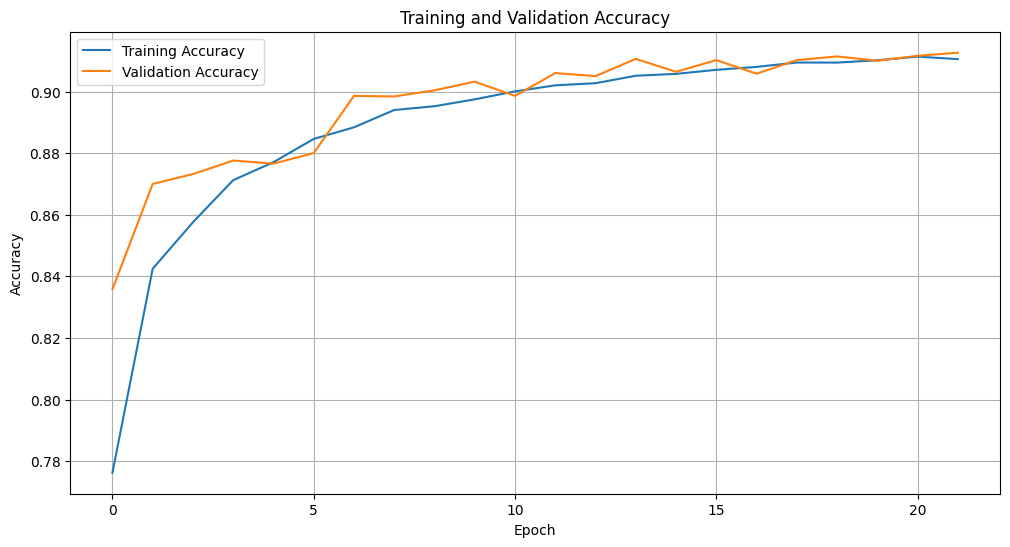

157/157 [==============================] - 1s 5ms/step - loss: 0.2447 - accuracy: 0.9134
Test Loss: 0.24470466375350952, Test Accuracy: 0.9133999943733215


In [14]:
model_early_stopping = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(
            1.0 / 255, input_shape=(img_width, img_height, img_depth)
        ),
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.01),
        tf.keras.layers.RandomZoom(0.1),
        tf.keras.layers.Conv2D(
            8,
            kernel_size=2,
            activation="relu",
            input_shape=(img_width, img_height, img_depth),
            padding="same",
        ),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(32, kernel_size=3, activation="relu", padding="same"),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(),  # spłaszczenie danych do wykorzystania warstwy gęstej
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(no_of_classes, activation="softmax"),
    ]
)

model_early_stopping.compile(
    # wybór optymalizatora
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    # miara, którą chcemy monitorować
    metrics=["accuracy"],
)

# wyświetlenie architektury
model_early_stopping.summary()

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=4, restore_best_weights=True
)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath="best_model.keras", monitor="val_loss", save_best_only=True
)

epochs = 30

# trening modelu
history_simple = model_early_stopping.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, model_checkpoint],
)

plt.figure(figsize=(12, 6))
plt.plot(history_simple.history["accuracy"], label="Training Accuracy")
plt.plot(history_simple.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


best_model = tf.keras.models.load_model("best_model.keras")
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

### **2. Uczenie transferowe**

W uczeniu transferowym wykorzystuje się wiedzę zdobytą przy rozwiązywaniu jednego problemu (na przykład klasyfikacji różnych gatunków zwierząt) i zastosowaniu jej do innego, powiązanego z nim problemu (na przykład klasyfikacja ras konkretnego gatunku). 

Mając mały zbiór danych lub mając małe zasoby obliczeniowe - warto zastosować technikę uczenia transferowego. 

Model, który został wcześniej przetrenowany z wykorzystaniem dużego zbioru danych, staje się punktem startowym w uczeniu innych zadań, na przykład klasyfikacji obrazu. 

Wykorzystując zbiór danych Recyclable Materials , który zawiera
 282 obrazów należące do 6 klas, wczytaj dane z podziałem na zbiór 
treningowy i walidacyjny (zbiór walidacyjny wyodrębnij ze zbioru 
treningowego - 20%). Etykiety powinny być generowane na podstawie 
struktury katalogów, a rozdzielczość obrazów - 224x224 piksele.

> Dataset: https://www.kaggle.com/datasets/minhoheo/recyable-materials ([local copy)](https://cs.pwr.edu.pl/zawada/umsi/download/data)

> Dokumentacja: [image_dataset_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [17]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

dataset_dir = "./recyclable_materials"

train_dataset = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
)

val_dataset = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
)

Found 282 files belonging to 1 classes.


Using 226 files for training.
Found 282 files belonging to 1 classes.
Using 56 files for validation.


In [18]:
mobilenet_base_scratch = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights=None)

mobilenet_base_scratch.trainable = True

mobilenet_base_scratch.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

Dostosujmy dane do użycia ich w tworzonym modelu - normalizacja danych do zakresu [-1,1], dodanie augmentacji.

In [19]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
data_augm = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ])

In [20]:
input = tf.keras.Input(shape=(224, 224, 3))
x = preprocess_input(input)
x = data_augm(x)
x = mobilenet_base_scratch(x, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.4)(x)
output = tf.keras.layers.Dense(6)(x)

mobilenet_pm_scratch = tf.keras.Model(input, output)

adam = tf.keras.optimizers.Adam(learning_rate=1e-4)
mobilenet_pm_scratch.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = adam,
    metrics=['accuracy'])
print("Output shape:", output.shape)
mobilenet_pm_scratch.summary()

Output shape: (None, 6)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 sequential_7 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                     

W kolejnym kroku uruchamiamy trening modelu - 15 epok, wykorzystując do walidacji wydzielone dane walidacyjne.

In [21]:
epochs_mobilenet = 15
history_scratch = mobilenet_pm_scratch.fit(
    train_dataset,
    epochs=epochs_mobilenet,
    validation_data=val_dataset)

Epoch 1/15
8/8 [==============================] - 33s 553ms/step - loss: 0.7025 - accuracy: 0.9602 - val_loss: 0.4294 - val_accuracy: 1.0000
Epoch 2/15
8/8 [==============================] - 4s 207ms/step - loss: 0.3925 - accuracy: 1.0000 - val_loss: 0.2242 - val_accuracy: 1.0000
Epoch 3/15
8/8 [==============================] - 4s 224ms/step - loss: 0.2132 - accuracy: 1.0000 - val_loss: 0.1235 - val_accuracy: 1.0000
Epoch 4/15
8/8 [==============================] - 4s 213ms/step - loss: 0.1260 - accuracy: 1.0000 - val_loss: 0.0754 - val_accuracy: 1.0000
Epoch 5/15
8/8 [==============================] - 4s 216ms/step - loss: 0.0808 - accuracy: 1.0000 - val_loss: 0.0523 - val_accuracy: 1.0000
Epoch 6/15
8/8 [==============================] - 4s 207ms/step - loss: 0.0602 - accuracy: 1.0000 - val_loss: 0.0396 - val_accuracy: 1.0000
Epoch 7/15
8/8 [==============================] - 4s 207ms/step - loss: 0.0450 - accuracy: 1.0000 - val_loss: 0.0309 - val_accuracy: 1.0000
Epoch 8/15
8/8 [===

Wyświetlmy na wykresie zmianę dokładności klasyfikacji dla danych walidacyjnych oraz testowych.

Text(0.5, 0.98, 'Zmiana dokładności w trakcie treningu')

Text(0.5, 0, 'epoka')

Text(0, 0.5, 'miara - dokładność')

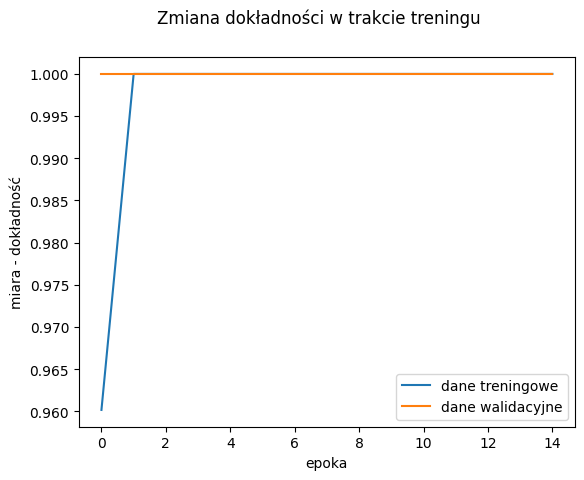

In [22]:
import matplotlib.pyplot as plt

figure = plt.figure()
figure.suptitle("Zmiana dokładności w trakcie treningu")
figure_acc = figure.add_subplot(1,1,1)
figure_acc.set_xlabel('epoka')
figure_acc.set_ylabel('miara - dokładność')
plt.plot(history_scratch.history['accuracy'])
plt.plot(history_scratch.history['val_accuracy'])
plt.legend(['dane treningowe', 'dane walidacyjne'])

plt.show()

Stwórz nowy model, wykorzystując model MobileNetV2 z wagami ImageNet,
ale dla pierwszych 50 warstw zablokuj możliwość ich treningu. Podobnie 
jak w poprzednim podejściu wytrenuj go, wykorzystującą tę samą ilość 
epok. Wyświetl wykres zmiany dokładności klasyfikacji dla danych 
treningowych i testowych oraz porównaj uzyskane wyniki z podejściem 
trenowania tego modelu od podstaw.

9406464/9406464 [==============================] - 4s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

Text(0.5, 0.98, 'Zmiana dokładności w trakcie treningu')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

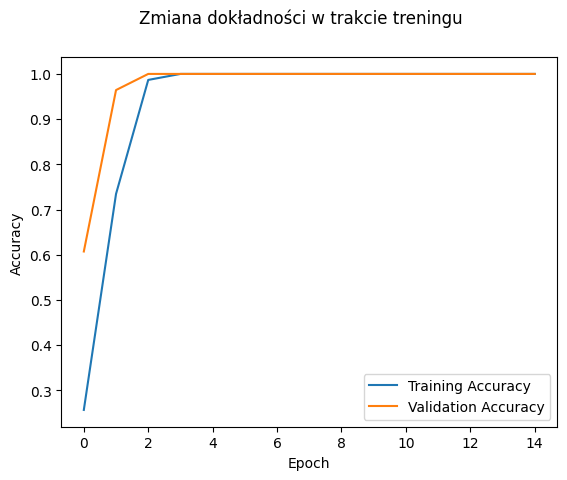

In [23]:
mobilenet_base_imagenet = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3), include_top=False, weights="imagenet"
)

for layer in mobilenet_base_imagenet.layers[:50]:
    layer.trainable = False

mobilenet_base_imagenet.summary()

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
data_augm = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip(mode="horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1),
    ]
)

input = tf.keras.Input(shape=(224, 224, 3))
x = preprocess_input(input)
x = data_augm(x)
x = mobilenet_base_imagenet(x, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.4)(x)
output = tf.keras.layers.Dense(6)(x)

mobilenet_pm_imagenet = tf.keras.Model(input, output)

adam = tf.keras.optimizers.Adam(learning_rate=1e-4)
mobilenet_pm_imagenet.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=adam,
    metrics=["accuracy"],
)

print("Output shape:", output.shape)
mobilenet_pm_imagenet.summary()

epochs_mobilenet = 15
history_imagenet = mobilenet_pm_imagenet.fit(
    train_dataset, epochs=epochs_mobilenet, validation_data=val_dataset
)

figure = plt.figure()
figure.suptitle("Zmiana dokładności w trakcie treningu")
figure_acc = figure.add_subplot(1, 1, 1)
figure_acc.set_xlabel("Epoch")
figure_acc.set_ylabel("Accuracy")
plt.plot(history_imagenet.history["accuracy"], label="Training Accuracy")
plt.plot(history_imagenet.history["val_accuracy"], label="Validation Accuracy")
plt.legend()

plt.show()

# Zadanie 2 (10pt)

Zaprogramuj i pokaż wykorzystanie klasycznych architektur sieci tzw. backbone


## Klasyczne sieci typu backbone

Sieci neuronowe znalazły zastosowanie w wielu różnych klasach problemach nierzadko znacznie przewyższając osiągnięciami poprzednio wykorzystywane modele. Bardziej wymagające problemy pociągnęły za sobą bardziej wyrafinowane modele neuronowe, które natomiast stawały się większe pod względem liczby parametrów, warstw i stopnia zaawansowania.

Jednym z bardziej eksplorowanych działów głębokiego uczenia jest wykorzystanie modeli neuronowych w zastosowaniach wizyjnych. Poniżej przedstawiony został graf zależności pomiędzy rozmiarami popularnych modeli neuronowych wykorzystywanych najczęściej w widzeniu komputerowym a ich trafnością klasyfikacji (zastosowanie: klasyfikacja obrazów, uczenie nadzorowane).

Źródło: "An Analysis of Deep Neural Network Models for Practical Applications", Alfredo Canziani, Adam Paszke, Eugenio Culurciello



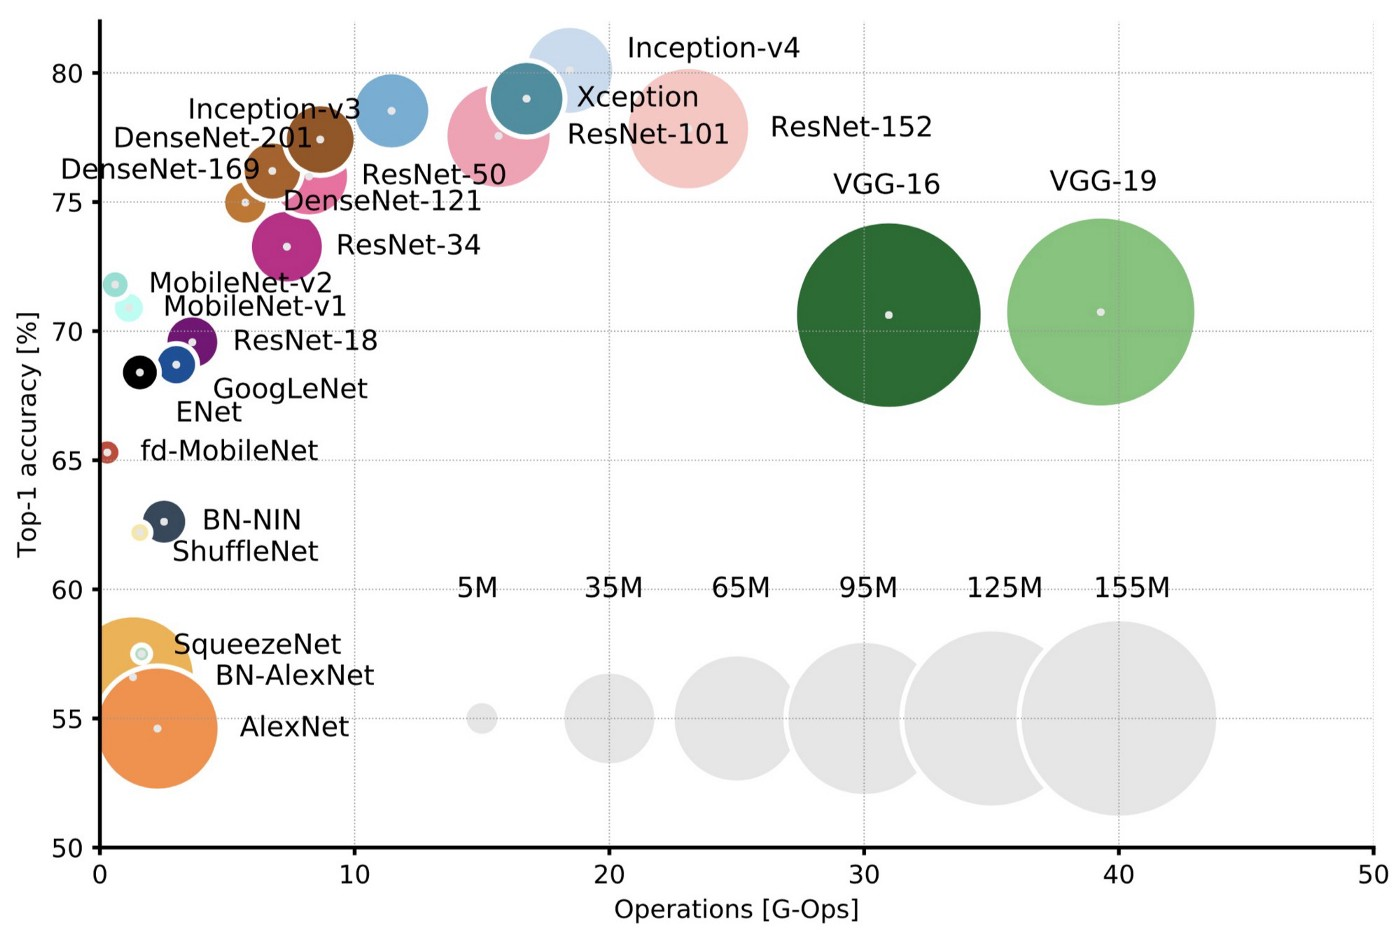

Modele liczące miliony operacji i miliony parametrów okazały się bardzo skutecznymi narzędziami do takich problemów jak klasyfikacja, detekcja obiektów czy tłumaczenie tekstów. Jednak ich rozmiar pociąga niewspółmiernie rosnącą złożoność obliczeniową, czasową i pamięciową w stosunku do skuteczności działania. Stąd, powstało zapotrzebowanie na opracowywanie nie głębszych, a *inteligentniejszych* modeli neuronowych. Takich, które posiadają względnie niską złożoność obliczeniową i osiągają podobne lub lepsze wyniki niż dotychczas wykorzystywane.

Ponieważ opracowanie zupełnie nowego modelu, bijącego poprzednie pod względem skuteczności działania jest bardzo trudne i kosztowne, rozwój sieci zaczął opierać się o stopniowy rozwój przyrostowy do istniejących już modeli. Aby nie wykonywać za każdym razem procesu uczenia tych samych modeli neuronowych zaczęto wykorzystywać poprzednio wyuczone modele, tym samym skupiając się wokół tematyki **transfer learning** oraz **fine-tuning**.

Komponenty neuronowe na których budowane są nowe funkcjonalności nazywane są **backbone-ami**, wykorzystanie modeli neuronowych nauczonych na **innej klasie problemu** do rozwiązania nowego problemy nazywa się **transfer learningiem**, natomiast proces dostrajania wstępnie nauczonych modeli neuronowych nazywa się **fine-tuningiem**.




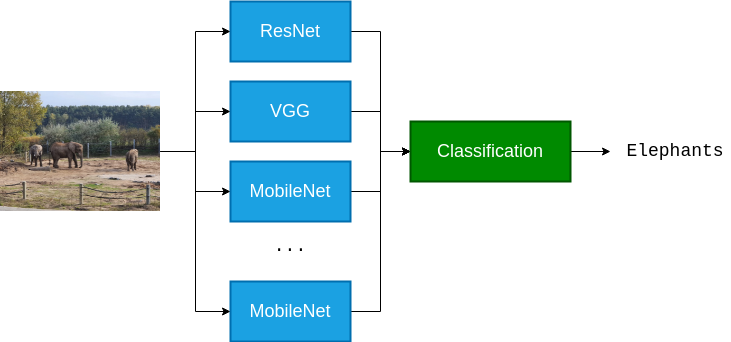

Takie modele jak ResNet, VGG, BERT czy Faster-RCNN są w praktyce bardzo 
często wykorzystywane, nawet wielokrotnie w jednym dużym modelu 
neuronowym. Stąd, popularne biblioteki do uczenia maszynowego zazwyczaj 
zawierają gotową implementację niektórych z nich. Dodatkowo, popularne 
stały się takie repozytoria jak TensorHub, HuggingFace czy ModelZoo do 
współdzielenia istniejących implementacji popularnych modeli neuronowych
 razem z ich pretrenowanymi wersjami.

## Keras

Keras w swojej implementacji zawiera gotowe definicje popularnych modeli (głównie do przetwarzania wizyjnego, w szczególności klasyfikacji) wraz z możliwością pobrania popularnych pretrenowanych wersji modeli.

Do wykonania tego zadania wykorzystaj TensorFlow oraz jego dostosowany moduł.

Keras zawiera wewnętrzny moduł `applications`, w którym można znaleźć definicje klas popularnych modeli neuronowych. Co jest bardzo ważne, modele te dziedziczą po klasie `tf.keras.Model`, dzięki czemu możliwa jest łatwa integracja własnego kodu.

In [ ]:
# model = tf.keras.applications.ResNet50V2(weights=None)
# model = tf.keras.applications.NASNetLarge(weights=None)
# model = tf.keras.applications.DenseNet121(weights=None)
# model = tf.keras.applications.VGG16(weights=None)
# model = tf.keras.applications.MobileNetV2(weights=None)

Modele zaimplementowane w Keras posiadają zestaw parametrów wejściowych, z których najważniejsze to:
- `weights` - w przypadku podania tego parametru Keras pobierze pretrenowany model na podanym zbiorze danych (obecnie możliwe wartości to `None` - czysty model oraz `imagenet` - model pretrenowany na zbiorze ImageNet),
- `include_top` - określenie czy będzie wykorzystywany końcowy moduł modelu odpowiedzialny za klasyfikację obrazów, w przypadku `include_top=False` model będzie zwracał **wektory osadzenia (embeddings)** obrazów,

In [24]:
!wget https://drive.google.com/uc?id=1jq6s6lP6B6CeqTDaa5uOrPy5ErSASiBj -O elephants.jpg

--2024-05-26 18:08:34--  https://drive.google.com/uc?id=1jq6s6lP6B6CeqTDaa5uOrPy5ErSASiBj
Resolving drive.google.com (drive.google.com)... 216.58.206.78, 2a00:1450:4001:802::200e
Connecting to drive.google.com (drive.google.com)|216.58.206.78|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1jq6s6lP6B6CeqTDaa5uOrPy5ErSASiBj [following]
--2024-05-26 18:08:34--  https://drive.usercontent.google.com/download?id=1jq6s6lP6B6CeqTDaa5uOrPy5ErSASiBj
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 216.58.212.129, 2a00:1450:4001:82f::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|216.58.212.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203797 (199K) [image/jpeg]
Saving to: ‘elephants.jpg’

elephants.jpg       100%[===================>] 199.02K  1.07MB/s    in 0.2s    

2024-05-26 18:08:35 (1.07 MB/s) - ‘elephants.jpg’ saved [2

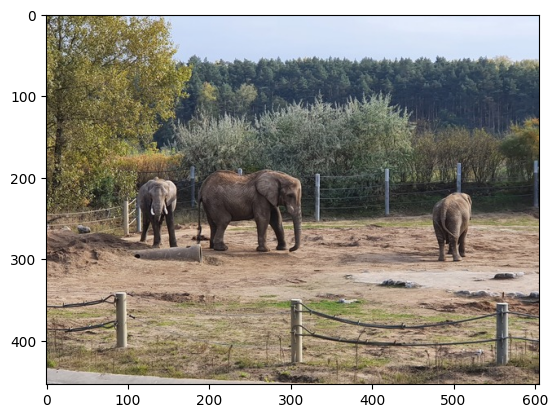

In [2]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
elephants = cv2.imread('./images/African_elephant_1.jpg')
elephants = cv2.cvtColor(elephants, cv2.COLOR_BGR2RGB)
elephants = tf.image.convert_image_dtype(elephants, tf.float32)
plt.imshow(elephants)

Np. dla ResNet50v2 sprawdzać możemy tak
```python
tf.keras.applications.resnet_v2.decode_predictions(output.numpy())
```

W tym zadaniu należy wykorzystać każdy z modeli `ResNet50V2`, `VGG16`, `MobileNetV2`, ... przetrenowany na zbiorze `ImageNet` i porównać te modele na zdjęciu 'elephants' i kilku innych wybranych dowolnie z sieci/aparatu itp. Następnie wykonać podobny diagram/tabelkę porównującą złożoność modeli. Zbiór testowy nie musi być duży, ale dobrze żeby miał kilka kategorii.

In [5]:
import re
import os
import numpy as np
import gc

model_info = {
    "ResNet50V2": {
        "model_class": tf.keras.applications.ResNet50V2,
        "preprocess": tf.keras.applications.resnet_v2.preprocess_input,
        "input_size": (224, 224),
    },
    "NASNetLarge": {
        "model_class": tf.keras.applications.NASNetLarge,
        "preprocess": tf.keras.applications.nasnet.preprocess_input,
        "input_size": (331, 331),
    },
    "DenseNet121": {
        "model_class": tf.keras.applications.DenseNet121,
        "preprocess": tf.keras.applications.densenet.preprocess_input,
        "input_size": (224, 224),
    },
    "VGG16": {
        "model_class": tf.keras.applications.VGG16,
        "preprocess": tf.keras.applications.vgg16.preprocess_input,
        "input_size": (224, 224),
    },
    "MobileNetV2": {
        "model_class": tf.keras.applications.MobileNetV2,
        "preprocess": tf.keras.applications.mobilenet_v2.preprocess_input,
        "input_size": (224, 224),
    },
}


def preprocess_image(image_path, target_size, preprocess_function):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)
    image = preprocess_function(image)
    image = np.expand_dims(image, axis=0)
    return image


def process(model_class, image):
    model = model_class(weights="imagenet")
    preds = model.predict(image)
    decoded = tf.keras.applications.imagenet_utils.decode_predictions(preds, top=1)[0][
        0
    ]
    return decoded


image_folder = "./images"
results = {model_name: {"correct": 0, "total": 0} for model_name in model_info.keys()}

for model_name, info in model_info.items():
    for image_file in os.listdir(image_folder):
        image_path = os.path.join(image_folder, image_file)

        true_label = re.match(r"([a-zA-Z_]+)_\d+\.[a-z]+", image_file).group(1)

        image = preprocess_image(image_path, info["input_size"], info["preprocess"])
        prediction = process(info["model_class"], image)
        predicted_label = prediction[1]

        if predicted_label == true_label:
            results[model_name]["correct"] += 1
        results[model_name]["total"] += 1

        print(f"{model_name}: {true_label} ({image_file}) -> {predicted_label}")
        
        gc.collect()


for model_name, result in results.items():
    accuracy = (result["correct"] / result["total"]) * 100
    model_info[model_name]["top1_acc"] = accuracy
    print(f"{model_name} Top-1 Accuracy: {accuracy:.2f}%")

1/1 [==============================] - 1s 729ms/step
ResNet50V2: African_elephant (African_elephant_3.jpg) -> tusker
1/1 [==============================] - 1s 745ms/step
ResNet50V2: Persian_cat (Persian_cat_3.webp) -> Persian_cat
1/1 [==============================] - 1s 729ms/step
ResNet50V2: Pomeranian (Pomeranian_1.jpg) -> Pomeranian
1/1 [==============================] - 1s 740ms/step
ResNet50V2: pug (pug_1.webp) -> pug
1/1 [==============================] - 1s 740ms/step
ResNet50V2: pug (pug_3.jpg) -> pug
1/1 [==============================] - 1s 718ms/step
ResNet50V2: African_elephant (African_elephant_4.jpg) -> African_elephant
1/1 [==============================] - 1s 746ms/step
ResNet50V2: Pomeranian (Pomeranian_4.jpg) -> Pomeranian
1/1 [==============================] - 1s 710ms/step
ResNet50V2: African_elephant (African_elephant_1.jpg) -> African_elephant
1/1 [==============================] - 1s 729ms/step
ResNet50V2: Persian_cat (Persian_cat_2.jpg) -> Persian_cat
1/1 [====

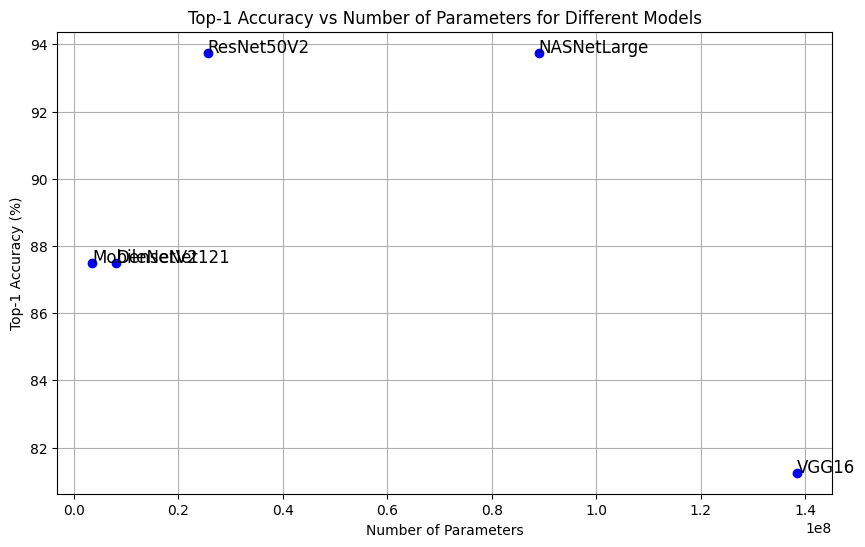

In [6]:
model_names = list(model_info.keys())
top1_accs = [model_info[model]["top1_acc"] for model in model_names]
params = [
    info["model_class"](weights="imagenet").count_params()
    for info in model_info.values()
]

plt.figure(figsize=(10, 6))
plt.scatter(params, top1_accs, color="blue")
for i, model in enumerate(model_names):
    plt.text(params[i], top1_accs[i], model, fontsize=12)
plt.xlabel("Number of Parameters")
plt.ylabel("Top-1 Accuracy (%)")
plt.title("Top-1 Accuracy vs Number of Parameters for Different Models")
plt.grid(True)
plt.show()